In [ ]:
import numpy as np
import operator 
from operator import itemgetter

In [ ]:
def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [ ]:
class KNN:
    def __init__(self, K=3):
        self.K = K
    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train
    def predict(self, X_test):
        predictions = [] 
        for i in range(len(X_test)):
              dist = np.array([euc_dist(X_test[i], x_t) for x_t in   
              self.X_train])
              dist_sorted = dist.argsort()[:self.K]
              neigh_count = {}
              for idx in dist_sorted:
                  if self.Y_train[idx] in neigh_count:
                      neigh_count[self.Y_train[idx]] += 1
                  else:
                      neigh_count[self.Y_train[idx]] = 1
              sorted_neigh_count = sorted(neigh_count.items(),    
              key=operator.itemgetter(1), reverse=True)
              predictions.append(sorted_neigh_count[0][0]) 
        return predictions

In [ ]:
from sklearn.datasets import load_digits
mnist = load_digits()
print(mnist.data.shape)


In [ ]:
X = mnist.data 
y = mnist.target

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1437, 64) (1437,)
(360, 64) (360,)


In [ ]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([139, 148, 141, 150, 139, 145, 138, 148, 137, 152]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([39, 34, 36, 33, 42, 37, 43, 31, 37, 28]))


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [ ]:
def fit(self,X,y):
  self.X_train=X
  self.y_train=y

In [ ]:
kVals = np.arange(3,100,2)
accuracies = []
for k in kVals:
  model = KNN(K = k)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc = accuracy_score(y_test, pred)
  accuracies.append(acc)
  print("K = "+str(k)+"; Accuracy: "+str(acc))

K = 3; Accuracy: 0.9861111111111112
K = 5; Accuracy: 0.9805555555555555
K = 7; Accuracy: 0.9861111111111112
K = 9; Accuracy: 0.9861111111111112
K = 11; Accuracy: 0.9861111111111112
K = 13; Accuracy: 0.9833333333333333
K = 15; Accuracy: 0.9777777777777777
K = 17; Accuracy: 0.9777777777777777
K = 19; Accuracy: 0.9777777777777777
K = 21; Accuracy: 0.975
K = 23; Accuracy: 0.9777777777777777
K = 25; Accuracy: 0.975
K = 27; Accuracy: 0.975
K = 29; Accuracy: 0.9694444444444444
K = 31; Accuracy: 0.9694444444444444
K = 33; Accuracy: 0.9694444444444444
K = 35; Accuracy: 0.9666666666666667
K = 37; Accuracy: 0.9666666666666667
K = 39; Accuracy: 0.9611111111111111
K = 41; Accuracy: 0.9583333333333334
K = 43; Accuracy: 0.9583333333333334
K = 45; Accuracy: 0.9583333333333334
K = 47; Accuracy: 0.95
K = 49; Accuracy: 0.9527777777777777
K = 51; Accuracy: 0.9527777777777777
K = 53; Accuracy: 0.95
K = 55; Accuracy: 0.95
K = 57; Accuracy: 0.95
K = 59; Accuracy: 0.9416666666666667
K = 61; Accuracy: 0.944444

In [ ]:
max_index = accuracies.index(max(accuracies))
print(max_index)

0


Text(0, 0.5, 'Accuracy')

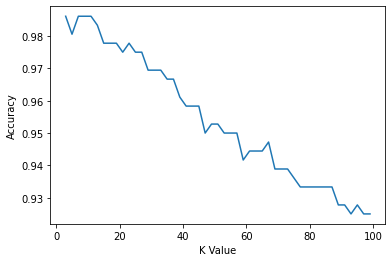

In [ ]:
from matplotlib import pyplot as plt 
plt.plot(kVals, accuracies) 
plt.xlabel("K Value") 
plt.ylabel("Accuracy")